# Transforming MRTS Raw Data into Insights: An ETL, Analysis, and Visualization Project

**Louis D. Baldioceda M.**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

*This is a brief description (150 words or less) of your analysis and the results of your model. Complete this portion of the template after you are done working on your project.*

This project aimed to extract insights from a complex, multi-sheet Excel file using ETL (Extract, Transform, Load) and analysis techniques in one integrated ETL and analysis process in Python code. Data was loaded into a MySQL database and analyzed to identify business resilience during global events like COVID-19 and the 2008 financial crisis, understand seasonal trends across different business lines, and uncover relationships between businesses. The project employed pandas for data manipulation, SQLAlchemy for database interaction, and the MySQL connector for database access. Key findings included the identification of resilient and vulnerable business lines, the presence of seasonality within specific sectors, and potential relationships among businesses. These insights can inform strategic decision-making and risk mitigation strategies.

[Back to top](#Index)


## 1. Introduction

*Introduce your project using 300 words or less. Describe all the processes you followed to create your ETL, Analysis, and Visualization project. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.*

This project transforms raw data from an Excel file into a structured format, analyzes its trends, and visualizes the key insights. I followed an ETL (Extract, Transform, Load) approach to prepare the data for analysis and visualization.

Extraction involves converting the original .xls file to a more manageable .xlsx format and loading it into a Python environment using pandas. Transformation cleanses and restructures the data to fit the defined database entities. It includes consolidating data from multiple sheets into a single dataframe, adding and removing columns, handling missing values, and rearranging the data structure to facilitate analysis by transforming the monthly data structure into date-stamped rows.

The Load stage utilizes Python libraries like pandas, SQLAlchemy, YAML, and the MySQL connector to create a database and import the prepared dataframe. Then, define the database schema and indexes to ensure efficient data storage and retrieval.

Finally, analysis and visualization leverage SQL queries facilitated by Seaborn and matplotlib visualization libraries, SQLAlchemy, and MySQL connector to extract meaningful insights from the prepared data. These insights include visualizing trends, percentage changes, percentage contributions, rolling window analysis, and communicating the findings.

This project demonstrates how data can be transformed from a raw state into a valuable resource for informed decision-making through an efficient ETL process and insightful analysis and visualization techniques.


[Back to top](#Index)

## 2. Extract-Transform-Load

*For each of the sections below, include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.*

[Back to top](#Index)

### 2.1 The ETL Process

*Describe, using your own words, the key steps to perform ETL on the provided MRTS dataset.*

1. Extraction: Convert the file to .xlsx from .xls and load the Excel file into an in-memory pandas DataFrame.
2. Transform: Process format changes to fit the database entities' definitions.
3. Load: Use SQLAlchemy and sqlconnector driver to import the dataframe into MySQL.

[Back to top](#Index)

### 2.2 Data Exploration

*Describe the MRTS dataset and the data that it contains. Feel free to do some research online to get more information about the dataset. This step is fundamental and it will help you with the development of your project.*

The Monthly Retail Trade Survey (MRTS) dataset is a product of the U.S. Census Bureau. It specifically focuses on the retail trade and food services sector covering construction, housing, international trade, retail trade, wholesale trade, services, and manufacturing. 
The dataset has monthly sales estimates by kind of business based on the North American Industry Classification System (NAICS) and was introduced with the 2016 Annual Retail Trade Survey (ARTS) and the April 2018 MRTS.

[Back to top](#Index)

### 2.3 Data Preparation

*Describe which modifications you want to perform on your dataset so that it’s ready for analysis. A few obvious ones are suggested in the video, but come up with at least one modification on your own as well.*

The idea is to consolidate all tabs (years) into one dataframe so Python can easily load it into a MySQL entity. Python needs to consolidate it with three additional columns added for the length of the NAICS code (to identify hierarchies), indicate the type of adjustment, and the year of the survey; lastly, replace all "(S)" and "(NA)" with 0 in all numeric columns and melt the DataFrame to transform month columns into date stamp rows.

[Back to top](#Index)

### 2.4 Read the Data Using Python

*Describe briefly how Python can be used to read CSV files.*

Python provides a simple and efficient way to read CSV (Comma-Separated Values) files using the built-in csv module or popular third-party libraries such as pandas.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

*Describe the sample dataset that you have defined to test your Python script to read CSV files and explain how you used Python to read it.*

The sample dataset includes Harry Potter enchantments. It has four columns:
- Enchantment: This column lists the name of the enchantment.
- Category: This column classifies the enchantment based on its function, such as summoning, severing, lighting, mending, shielding, stunning, disarming, or levitating.
- Effect: This column briefly describes the primary effect of the enchantment.
- Notes: This column provides additional information about the enchantment, such as the possibility of non-verbal casting, specific uses, or limitations.

I used the pd.read_csv pandas function to upload the dataset in-memory, as shown below:

```Python
import pandas as pd
df = pd.read_csv(sample_datat.csv')```


In [11]:
import pandas as pd
df = pd.read_csv('asset/sample_data.csv')
df

,Enchantment,Category,Effect,Notes
0,Accio,Summoning Charm,Brings the desired object to the caster,Non-verbal form possible for skilled wizards
1,Diffindo,Severing Charm,Severes or splits objects cleanly,Can be used for precise cutting or tearing
2,Lumos,Light Charm,Creates light at the tip of the wand,Countered by the Nox spell
3,Reparo,Mending Charm,Repairs broken objects,Can be used on a wide variety of objects
4,Protego,Shielding Charm,Creates a shield to deflect spells,Strength varies depending on the caster's skill
5,Stupefy,Stunning Spell,"Stuns an opponent, rendering them unconscious",Commonly used in duels and for self-defense
6,Expelliarmus,Disarming Charm,Forces the opponent to release their wand,Effective way to disarm an opponent without ca...
7,Wingardium Leviosa,Levitation Charm,Raises objects into the air and allows them to...,Often used in magical training and everyday life


[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

*Describe how to read the MRTS CSV file using a Python script.*

The MRTS CSV file can also be read using the pd.read_csv pandas function to upload the dataset in memory, as shown below. But I chose to read it using pd.ExcelFile to be able to access more than one tab of the workbook.

```Python
import pandas as pd
df = pd.read_csv('asset/3Ymrtssales.csv')
```

The extract and transformation tasks are below:

1. Define a function to calculate the length of each NAICS code (for later use).
2. Open the Excel file.
3. Initialize starting and ending indices.
4. Create a list to store raw datasets from each sheet.
5. Start a loop over all the sheets in the Excel file.
6. Read data from the current sheet.
7. Rename columns.
8. Convert the NAICS Code column to string data type.
9. Find the starting and ending indexes
10. Get the raw_dataset using indexes
11. Add required columns (Length of code, Adjusted, Year)
12. Append the raw_dataset to the list
13. End the loop to concatenate all raw datasets into one DataFrame.
14. Replace "(S)"and "(NA)" with 0 in all numeric columns.
15. Melt the DataFrame to transform month columns into date stamp rows
16. Export to CSV for review.
17. Print confirmation.

In [93]:
import pandas as pd

#FUNCTIONS

# Define a function to calculate the length of each NAICS code
def calculate_length(naics_code):
    return len(naics_code)

# Define a function to extract the year from the 'Year' column
def extract_year(sheet_name):
    return int(sheet_name)

#EXTRACT

# Open the Excel file
xlsx = pd.ExcelFile('asset/mrtssales92-present.xlsx')

#TRANSFORM

# Initialize starting and ending indices
start_index = None
end_index = None

# List to store raw datasets from each sheet
raw_datasets = []

# Loop over all the sheets in the Excel file
for sheet_name in xlsx.sheet_names:
    if sheet_name == '2021':
        continue  # Skip the sheet named '2021'
    
    # Read data from the current sheet
    df = pd.read_excel(xlsx, sheet_name=sheet_name, dtype={'NAICS': str})
    
    # Rename columns
    df.columns = ['NAICS', 'Description', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','total']
    
    # Convert the NAICS column to string data type
    df['NAICS'] = df['NAICS'].astype(str)
    
    # Find the starting index where 'code' is equal to '441'
    if start_index is None:
        start_index = df.index[df['NAICS'] == '441'][0]
    
    # Find the ending index where 'code' is equal to '722513, 722514, 722515'
    if end_index is None:
        end_index = df.index[df['NAICS'] == '722513, 722514, 722515'][0]
    
    # Get the raw_dataset using iloc
    raw_dataset = df.iloc[start_index:end_index + 1]

    # Add a column with the length of NAICS at index 0
    raw_dataset.insert(0, 'NAICS_LEN', raw_dataset['NAICS'].apply(calculate_length))
    
    # Add a column with the NOT ADJUSTED label at index 0
    raw_dataset.insert(0, 'Adjusted', False)
    
    # Add a column with the sheet name at index 0
    raw_dataset.insert(0, 'Year', sheet_name)
    
    # Append the raw_dataset to the list
    raw_datasets.append(raw_dataset)

# Concatenate all raw datasets into one DataFrame
consolidated_df = pd.concat(raw_datasets, ignore_index=True)

# Drop the 'total' column
consolidated_df.drop(columns=['total'], inplace=True)

# Replace "(S)"and "(NA)" with 0 in all numeric columns
consolidated_df.iloc[:, 5:] = consolidated_df.iloc[:, 5:].replace({'(S)': 0,'(NA)':0})

# Melt the DataFrame to transform month columns into rows
melted_df = pd.melt(consolidated_df, id_vars=['Year', 'Adjusted', 'NAICS', 'NAICS_LEN', 'Description'],
                    var_name='Month', value_name='Sales')

# Extract the year from the 'Year' column
melted_df['Year'] = melted_df['Year'].apply(extract_year)

# Create a date stamp using the year and month
melted_df['Date'] = pd.to_datetime(melted_df['Year'].astype(str) + '-' + melted_df['Month'], format='%Y-%m')

# Drop the 'Year' and 'Month' columns
melted_df.drop(columns=['Year', 'Month'], inplace=True)

# Export the melted DataFrame to CSV
melted_df.to_csv('melted_data.csv', index=False)

# Print confirmation
print("Melted DataFrame exported to CSV.")

Melted DataFrame exported to CSV.


[Back to top](#Index)

### 2.5 Writing an Installation Script

*Describe how you wrote a Python installation script to read your dataset in MySQL WorkBench.*

The load tasks are below:

1. Installed required libraries: pandas, sqlalchemy, yaml, and mysql-connector-python2. Imported the libraries.
3. Loaded database configuration from YAML file (without database name).
4. Created an engine to connect to MySQL database using SQLAlchemy.
5. Executed the SQL statement to create the new database and closed the connection.
6. Created a new engine with the updated db_url (with new database name).
7. Defined table schema using SQLAlchemy.
8. Defined indexes using SQLAlchemy.
9. Created entity in the database with indexes and options.
10. Inserted dataframe into the entity.
11. Committed changes and closed the connection.





```python
#LOAD
# Load database configuration from YAML file
db = yaml.safe_load(open('db.yaml'))
db_url = f"mysql+mysqlconnector://{db['user']}:{db['pwrd']}@{db['host']}"

# Create engine and connect to MySQL database using SQLAlchemy
engine = create_engine(db_url)

# Create a connection to the MySQL server
conn = engine.connect()

# Execute the SQL statement to create the new database
conn.execute(text("DROP DATABASE IF EXISTS mrts"))
conn.execute(text("CREATE DATABASE IF NOT EXISTS mrts"))

# Close the connection to the MySQL server
conn.close()

# Update the db_url to include the new database
db_url = f"mysql+mysqlconnector://{db['user']}:{db['pwrd']}@{db['host']}/{db['db']}"

# Create a new engine with the updated db_url
engine = create_engine(db_url)

# Define table schema using SQLAlchemy
metadata = MetaData()
mrts = Table('mrts', metadata,
                     Column('mrtsID', Integer, primary_key=True, autoincrement=True),
                     Column('Adjusted', String(99), nullable=False),
                     Column('NAICS', String(99)),
                     Column('NAICS_LEN', String(99)),
                     Column('Description', String(200)),
                     Column('Sales', Float),
                     Column('Date', Date))

# Define indexes
mrtsID_index = Index('mrtsID', mrts.c.mrtsID, unique=False)
NAICS_index = Index('NAICS', mrts.c.NAICS, unique=False)
Date_index = Index('Date', mrts.c.Date, unique=False)

# Create table in the database with indexes and options
metadata.create_all(engine, checkfirst=True)

# Insert data into the table
melted_df.to_sql(name='mrts', con=engine, if_exists='append', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()
engine.dispose()

print("Melted DataFrame exported to MySQL.")
```


[Back to top](#Index)

## 3. Analysis and Visualization

*For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.*

*Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.*

The choice depends on user experience and desired capabilities. Workbench is easier for beginners and simpler queries, while Python offers more flexibility and automation for experienced users.

- MySQL Workbench:

Pros: User-friendly interface, simplified query building, direct database connection.

Cons: Limited flexibility, limited automation, potential security concerns.
- Python Environment:

Pros: Flexible and powerful, allows automation, integrates with data analysis tools.

Cons: Requires coding knowledge, indirect database connection, less user-friendly.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

*Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.*

The first query I ran was to see all the contents of the newly created database and entity mrts by using the following code:

```MySQL
USE `mrts`;
SELECT * FROM mrts;
```
Afterward, I checked if the months were melted into rows correctly by executing the query below:
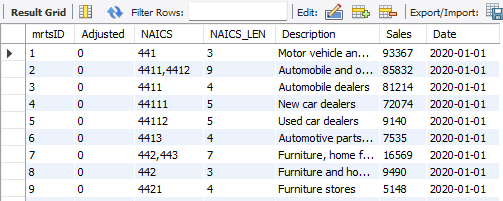
```MySQL
SELECT date, Description, CAST(sum(sales) as UNSIGNED) as sales
FROM mrts
WHERE Description IN ('New car dealers', 'Used car dealers')
GROUP BY 1, 2
ORDER BY 1, 2;
```
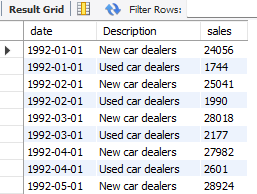

[Back to top](#Index)

### 3.2 Running Queries From Python

*Describe how you tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window.*

1. Imported required libraries.
2. Loaded database configuration from YAML file.
3. Created SQLAlchemy engine and connection to the MySQL server.
5. Executed the same raw MySQL statement by using the function text().
6. Closed the connection and disposed the engine.

```Python
from sqlalchemy import create_engine, text
import yaml


# Load database configuration from YAML file
db = yaml.safe_load(open('db.yaml'))
db_url = f"mysql+mysqlconnector://{db['user']}:{db['pwrd']}@{db['host']}/{db['db']}"

# Create an engine
engine = create_engine(db_url)

# Create a connection to the MySQL server
conn = engine.connect()

# Execute the SQL statement
result = conn.execute(text(
    """
SELECT date, Description, CAST(sum(sales) as UNSIGNED) as sales
FROM mrts
WHERE Description IN ('New car dealers', 'Used car dealers')
GROUP BY 1, 2
ORDER BY 1, 2;
    """
# Fetch and process the results
for row in result:
    print(row)

conn.close()
engine.dispose()
```

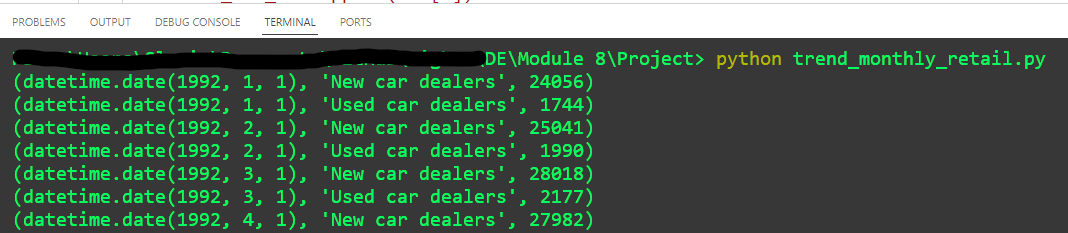

[Back to top](#Index)

### 3.3 Explore Trends

*Describe which *queries* you wrote the explore the differences in trends between various categories in your data.*

*In your submission make sure to answer the following:*

1. *What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?*

Economic trends are sustained and directional movements observed in various economic indicators over extended periods. These indicators, encompassing factors like GDP, employment rates, inflation, and interest rates, collectively paint a picture of the general health and trajectory of an economy. These trends can be upward (an expansion or boom), downward (a contraction or recession), or relatively stable (a plateau or period of stagnation).

Economic trends are important for predicting quantities like spending patterns because they offer:

- Historical context: Economic trends help us understand historical changes in the economy. By studying these trends, we can gain insights into how different factors have influenced economic activities in the past.
- Predictive power: Trends often continue for a certain period of time. Therefore, if we can identify a trend, we can make educated predictions about what will happen in the future. For example, if there is a trend of increasing consumer spending, businesses might expect this to continue and plan their production and marketing strategies accordingly.
- Informed decision-making: Individuals, businesses, and government can use economic trends to make informed decisions. For instance, understanding trends in job growth or housing prices can help individuals decide when to look for a job or buy a house. Similarly, businesses can use trends in consumer spending to decide when to launch a new product or expand into a new market. Also, if there is a trend of increasing inflation, the central bank might decide to increase interest rates to control inflation.
- Identification of risks and opportunities: Trends can highlight potential challenges and opportunities associated with economic fluctuations, like changes in consumer spending behavior.

Economic data can exhibit inherent volatility, and even established trends can undergo unexpected shifts due to unforeseen events like natural disasters, political upheavals, or technological breakthroughs. Therefore, scholars emphasize the importance of combining trend analysis with other methodologies such as statistical modeling, in-depth market research, econometric analysis, and scenario planning to gain a more comprehensive understanding of factors influencing spending patterns.

2. *What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?*

It is an upward trend (see below). Since the data had many subtotals and duplicate amounts, I had to identify the top hierarchy by measuring the length of the COICS code to isolate the totals.

![Screenshot 2024-02-27 113929.png](asset/Screenshot%202024-02-27%20113929.png)
Source: trend_yearly_total.py

3. *When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly?*

Based on the data, sporting goods stores have the highest overall trend. Their sales have been increasing steadily over the analyzed period.

![Screenshot 2024-02-27 150616.png](asset/Screenshot%202024-02-27%20150616.png)
Source: trend_yearly_cat.py

Sporting goods stores have increased faster other 20 years.

![Screenshot 2024-02-27 151756.png](asset/Screenshot%202024-02-27%20151756.png)
Source: trend_yearly_cat.py

The highest trend is for sporting goods stores, as you can see below. The other two are relatively stable since 1992.
For sporting goods, hobbies, toys, and games stores, there is a seasonal pattern in December exposed by an exponential increase every year, decreasing to the lower levels in January.
For book stores, there is a an exponential increase every year in August and January.

In 2020 there was a 30% drop on sales for women's and 60% for men's due to the pandemic. The monthly trend is better to visualize seasonality, but it can add complexity.

![Screenshot 2024-02-27 114958.png](asset/Screenshot%202024-02-27%20114958.png)
Source: trend_monthly_retail.py

[Back to top](#Index)

### 3.4 Explore Percentage Change

*Describe which *queries* you wrote to explore the differences in trends between various categories in your data.*

*In your submission make sure to answer the following:*

1. *In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?*

The percentage change is a simple mathematical concept that measures the degree of change over time. It is calculated as the difference between the new value and the original value, divided by the absolute value of the original value, and then multiplied by 100 to get a percentage. The percentage change is considered an important measure in economics for several reasons:

- Comparability: Percentage change allows for the comparison of changes across different categories, even when the absolute values of the data are very different. This makes it easier to compare growth rates or declines across different sectors, countries, or time periods.
- Trend Analysis: Percentage change is often used in trend analysis to understand how a particular variable changes over time. This can help in identifying patterns and predicting future behavior.
- Predicting Spending Patterns: When it comes to predicting spending patterns, understanding the percentage change in income, prices, or other economic indicators can be very useful. For example, if there is a consistent increase in consumer income, we might predict an increase in consumer spending.

2. *Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?*

As you can see below, the business are related since the percentage change is similar across the timeframe. 

![Screenshot 2024-02-27 195108.png](asset/Screenshot%202024-02-27%20195108.png)
Source: trend_yearly_cat2.py

![Screenshot 2024-02-27 195148.png](asset/Screenshot%202024-02-27%20195148.png)
Source: trend_yearly_cat2.py

The percentage of contribution of the women's clothing is around 75-90% and the men's clothing is around 25-10%, as you can see below:
![Screenshot 2024-02-27 212058.png](asset/Screenshot%202024-02-27%20212058.png)
Source: trend_yearly_cat2.py

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


*Describe which *queries* you wrote to explore the differences in trends between various categories in your data.*

*In your submission, make sure to answer the following:*

1. *In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?*

A rolling time window refers to a type of analysis where a specific ‘window’ or period of time moves across the data set. This window is ‘rolled’ forward through the data set, one time period at a time, and the analysis is repeated for each window. Here’s why it’s considered an important measure:

- Stability Over Time: A rolling time window can help assess the stability of a model over time1. If the parameters of a model are truly constant over the entire sample, then the estimates over the rolling windows should not be too different.
- Forecast Accuracy: It can also be used to assess the forecast accuracy of a model. By comparing the model’s predictions to the actual data within each window, you can get a sense of how well the model is likely to perform in the future.
- Adapting to Changes: Economic data can change over time due to various factors. A rolling time window allows the model to adapt to these changes, making it more responsive and accurate.
- Predicting Spending Patterns: When predicting spending patterns, a rolling time window can provide a more accurate and up-to-date model. It reflects the most recent trends and discards outdated information, which is crucial when dealing with economic data that can change rapidly.

2. *Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?*

The following graphs compare the maximum, average, minimum, and standard deviation for the food services and drinking places industry with the food and beverage stores industry. The data shows an overall upward trend with high volatility in 2008 and 2000 for both. The Food services catch up with food stores around 2012.

![Screenshot 2024-02-27 234100.png](asset/Screenshot%202024-02-27%20234100.png)
Source: rolling_yearly_cat.py
![Screenshot 2024-02-27 234117.png](asset/Screenshot%202024-02-27%20234117.png)
Source: rolling_yearly_cat.py



[Back to top](#Index)

## Conclusion

*Describe your conclusions. Which one of the businesses considered seems like it's going to attract the least spending? Which business seems likely to attract the most spending?*

- After conducting an analysis of the Monthly Retail Trade Survey (MRTS) dataset using Python and MySQL, I have gained valuable insights into the U.S. economy's retail trade and food services sector.

- The ETL process allowed us to clean, transform, and load the data into a MySQL database efficiently, streamlining the subsequent analysis and visualization steps.

- Through trend analysis, I identified significant patterns and changes in the data over time. The rolling time window analysis provided a dynamic view of these trends, allowing me to understand the stability and predictability of the data.

- Calculating percentage changes helped me quantify the rate of change in various economic indicators, providing a clear picture of growth or decline. Additionally, the percentage contribution analysis offered insights into the relative importance of different sectors or categories within the retail trade.

- The Motor vehicle and parts dealers, followed by the food and beverage stores businesses, will continue to attract the most spending due to their consistently high sales.


[Back to top](#Index
)
## References

- "Census API: Datasets in /data/timeseries/eits/mrts and its descendants.
" US Census Bureau. Access date 2024-02-24 https://api.census.gov/data/timeseries/eits/mrts.htmll

- "Monthly Retail Trade Annual Revision Reports." US Census Bureau. Access date 2024-02-24. https://www.census.gov/retail/mrts/historic_releases.html

- "Rolling-Window Analysis of Time-Series Models." MathWorks. Access date 2024-02-27. https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html